# SG Wuhan Network Modelling

#### Author: leebond
#### Data: Ottokyu

#### Date: Feb 2020


## Contents:
1. Overall network graph
2. 10 Most Influential Nodes
3. 10 Most Convenient Nodes
4. 10 Most Closely related Nodes
5. Conclusion
    - Covid-19 clusters
     - Yong Thai Tang
     - Grace Assembly of God (Bukit Timah & Tanglin)
     - Ang Mo Kio Catholic Church (Mei Hwan Drive)
     - Seletar Aerospace Heights

In [1]:
import requests
import json
import re
import networkx as nx
from networkx.readwrite import json_graph
import matplotlib.pyplot as plt

from SGWuhanHelperFunctions import *

In [2]:
%%time
### Kudos to Ottokyu (https://twitter.com/ottokyu) creator of https://sgwuhan.xose.net/ for making the data available
! python getDataFromSgWuhan.py

CPU times: user 9.34 ms, sys: 9.48 ms, total: 18.8 ms
Wall time: 553 ms


In [3]:
import pickle as pkl
with open('./data/sgwuhandata.pkl', 'rb') as f:
    data_dict = pkl.load(f)

### Data Dictionary
the data is stored with the following attributes per record
- each record can be thought of as a node
- a node can be either 
 - a Case that stores case information such as demographics and places visited
 - a Place that stores information of the Cases that had visited

In [4]:
data_dict['data'][0].keys()

dict_keys(['lat', 'lng', 'caseType', 'age', 'gender', 'from', 'stayed', 'visited', 'caseNo', 'citizenship', 'relatedArrayNo', 'mohURL', 'confirmDate', 'location', 'relatedCaseNo'])

## Creating the Network Graph

**Since Case information provides all the necessary information, we will use only the Case records to build the graph** 
### Attributes used to build the graph
- caseNo: the case
- stayed: where the case stayed in Singapore (can be nil)
- visited: places visited by the case (can be nil)
- relatedCaseNo: Case with biological relation to the main Case
- from: Nationality

In [5]:
len(data_dict['data'])

150

In [6]:
g = nx.Graph()
nodes_to_ignore = ['hospital','gp clinic','polyclinic']
g = loadGraph(g, data_dict, nodes_to_ignore)

### Overall network
- hospitals and gp clinics are removed from the network since they will cause bias in the network analysis

#### Network description
- each node is either a Case or a location
- the edges are non-directed and a link between nodes is present if the Case has been to that location

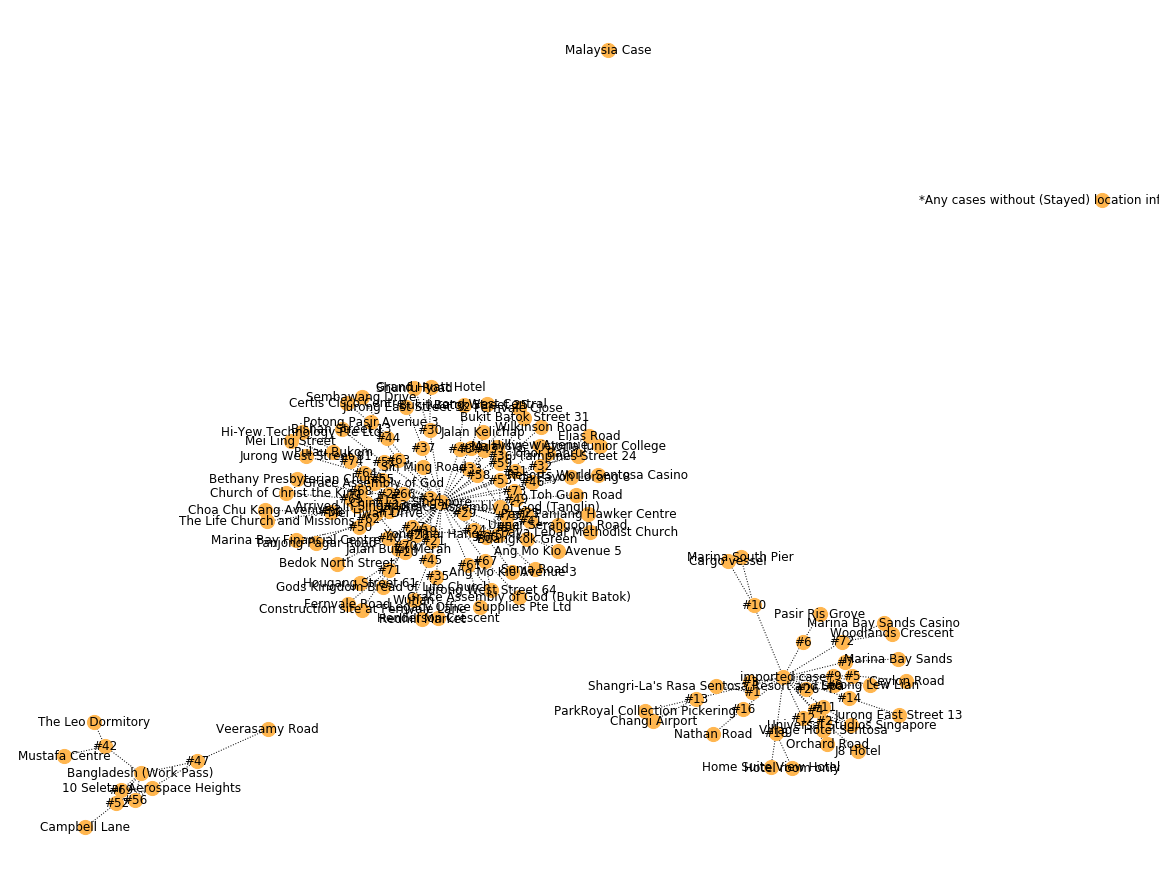

In [7]:
showGraph(g)

#### Let us remove the Singapore and Imported Case nodes

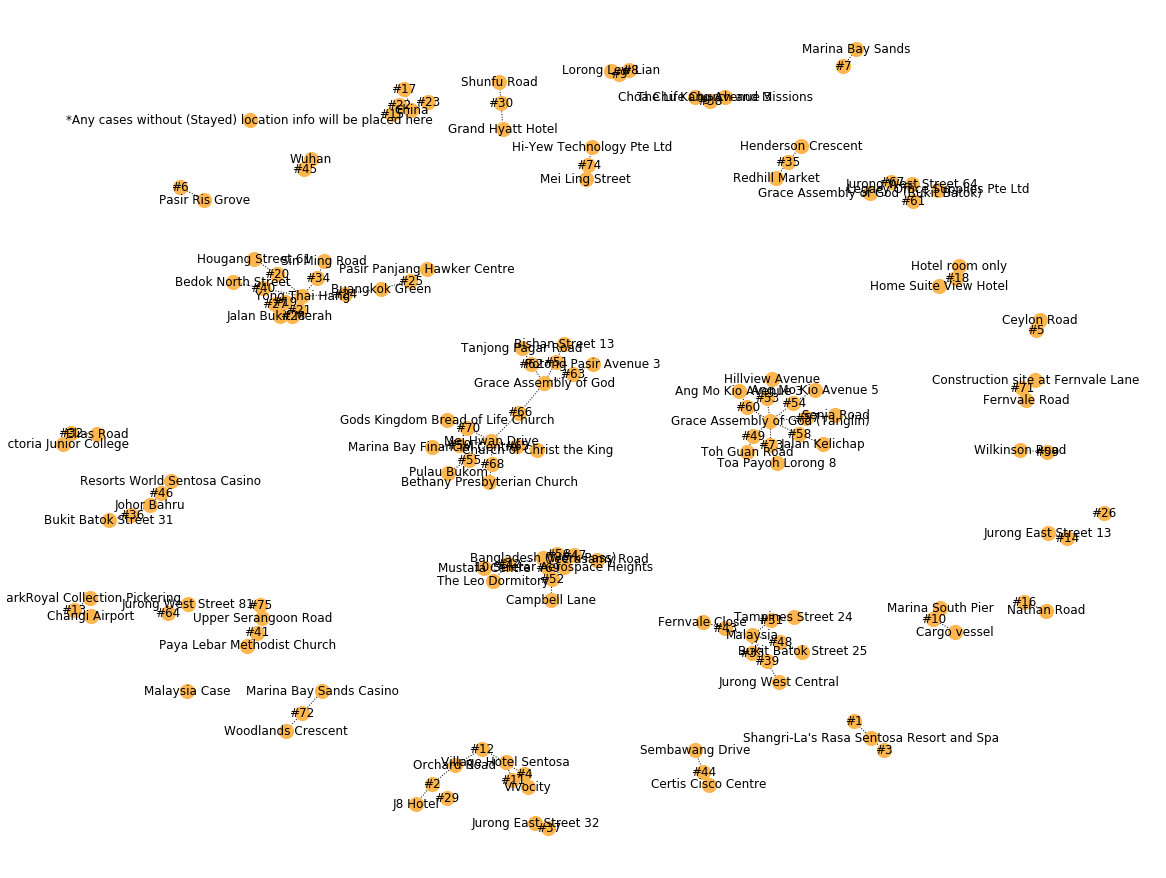

In [8]:
g = nx.Graph()
nodes_to_ignore = ['hospital','gp clinic','polyclinic','singapore','imported case']
g = loadGraph(g, data_dict, nodes_to_ignore)
showGraph(g)

###  10 Most Influential Nodes
- Katz centrality computes the centrality for a node based on the centrality of its neighbors. It is a generalization of the eigenvector centrality

- In other words, it measures how well a node is connected to all other well-connected nodes, think of it as clusters of influence

- source: https://networkx.github.io/documentation/stable/

In [9]:
katz = getNodeCentrality(g, nx.katz_centrality)

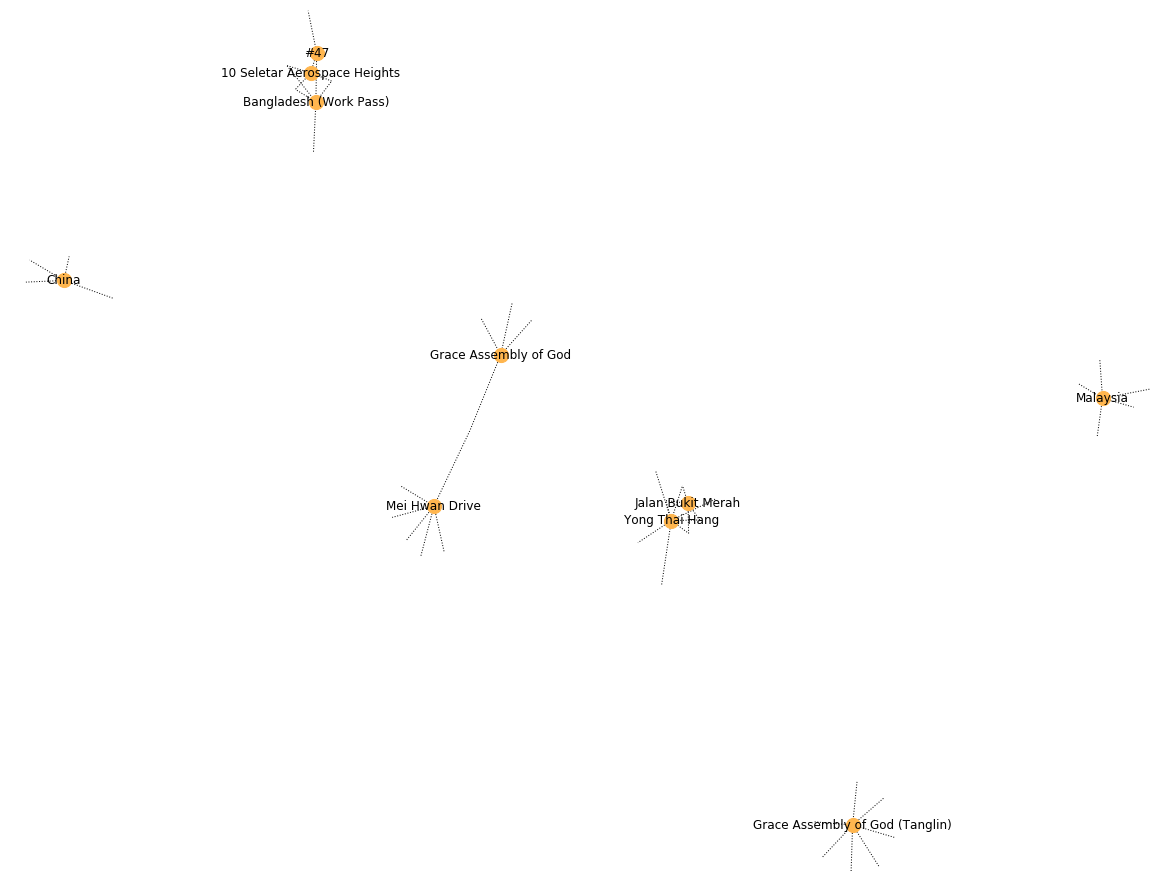

In [10]:
showSubGraph(g, katz, 10)

### 10  Most Convenient Nodes
- Betweenness centrality computes the centrality for a node based on how easy it is for a node to reach another node.
- In other words, it shows how quick each node can jump to another
- source: https://networkx.github.io/documentation/stable/

In [11]:
bet = getNodeCentrality(g, nx.betweenness_centrality)

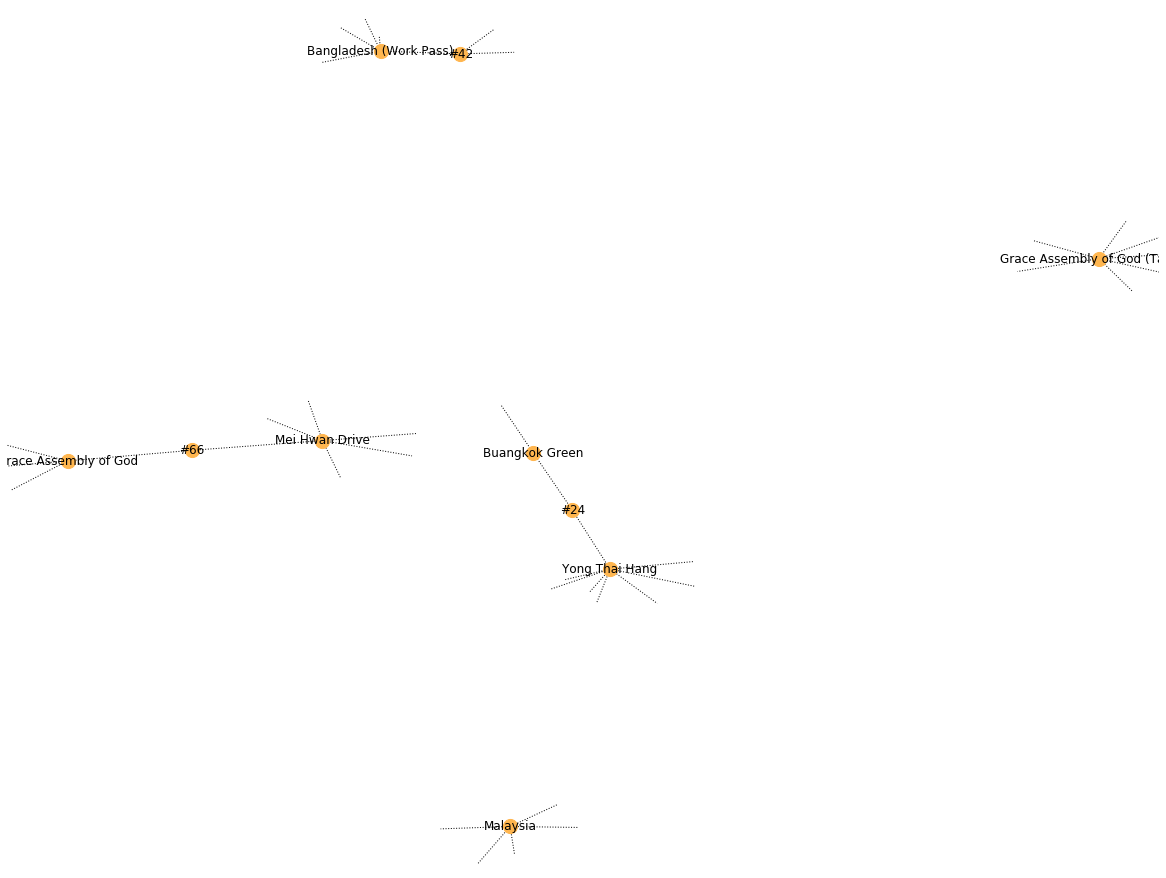

In [12]:
showSubGraph(g, bet, 10)

###  10 Most Centralized Nodes
- The closeness centrality computes the shortest distance to move from one node to another
- In other words, these are nodes that are frequently used for as 'bridges'
- source: https://networkx.github.io/documentation/stable/

In [25]:
clos = getNodeCentrality(g, nx.closeness_centrality)

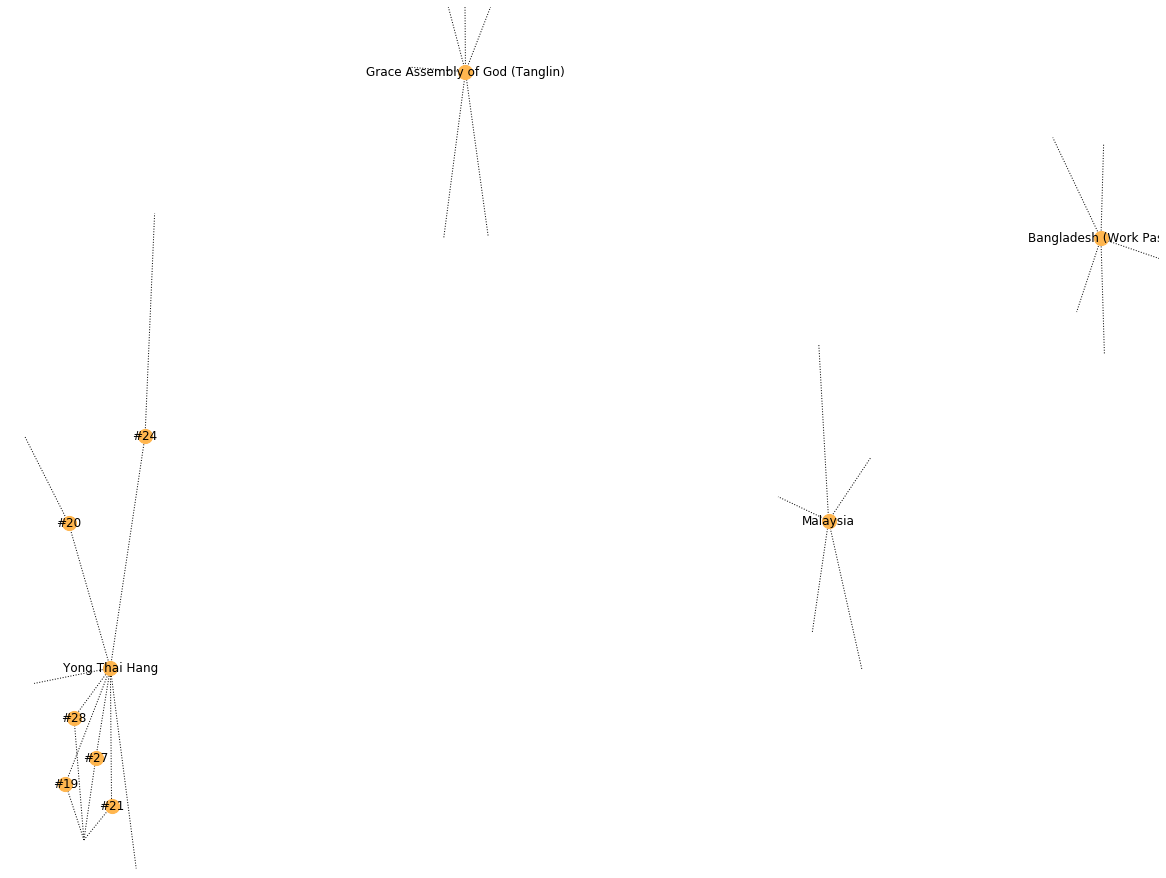

In [26]:
showSubGraph(g, clos, 10)

## Conclusion

- Base on the graph centralities, we can easily identify clusters of covid-19
 - Yong Thai Tang
 - Grace Assembly of God (Bukit Timah & Tanglin)
 - Ang Mo Kio Catholic Church (Mei Hwan Drive)
 - Seletar Aerospace Heights